In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as spy
import keras
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.optimizers import Adam,RMSprop
df = pd.read_csv('winequality-white.csv')

2021-08-11 12:11:24.330688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-11 12:11:24.330706: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Olhando abaixo, não temos nenhum valor N/A, então não precisamos tratar isso.

In [2]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
print(len(df))
df

4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

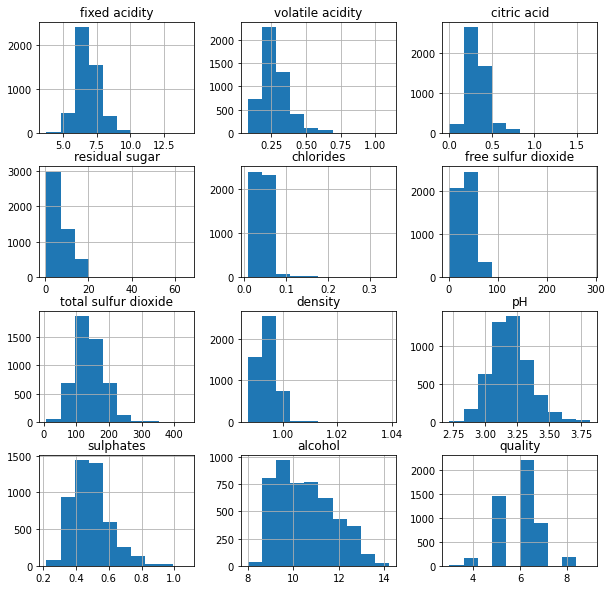

In [5]:
df.hist(figsize = (10, 10))

Podemos ver acima que temos um desbalancemaneto na quantidade de amostras. Temos muitas regulares e poucas ruins e ótimas. Vamos usar uma técnica chamada SMOTE que consiste em fazer o oversampling das amostras minoritárias, deixando assim o dataset balanceado. Essa técnica foi descrita no artigo.

In [6]:
X=df.drop(columns=['quality'])
y=df['quality']

In [7]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [8]:
print(y.dtypes)
print(y.count())
y.value_counts()

int64
15386


6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

Pronto, agora temos todas as amostras em quantias iguais.

mapa de correlação:

<AxesSubplot:>

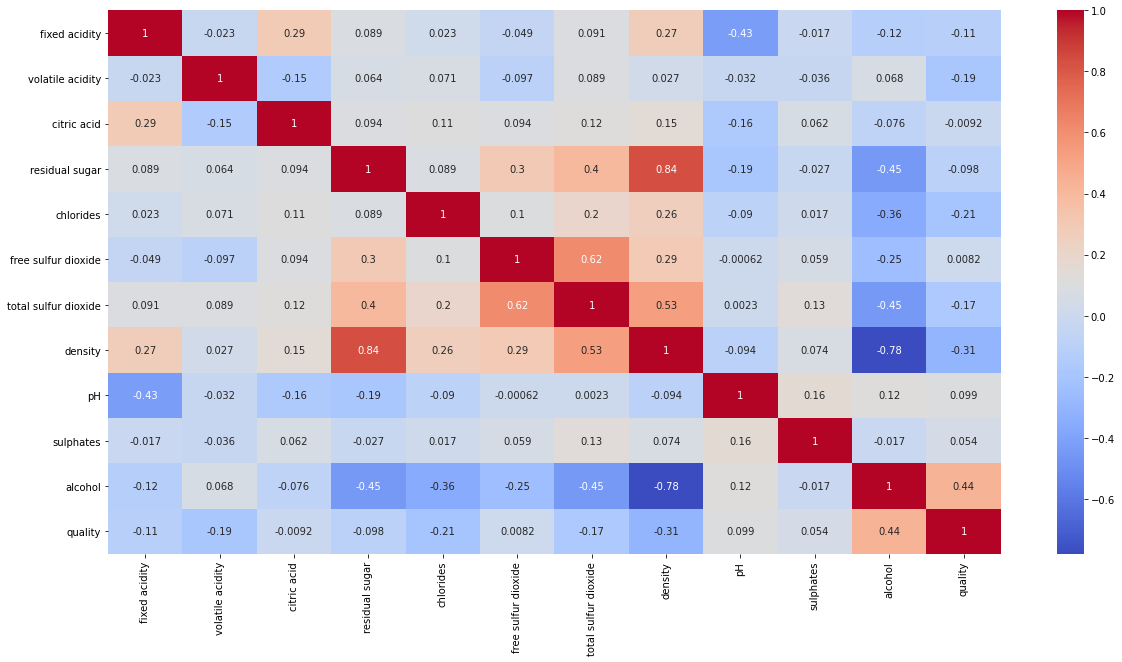

In [9]:
corr=df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,annot=True, cmap='coolwarm')

Também quero codificar essas qualidades numericamente:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=21)
print('Formato do dataset de treinamento Xs:{}'.format(X_train.shape))
print('Formato do datasett de teste Xs:{}'.format(X_test.shape))
print('Formato do dataset de treino y:{}'.format(y_train.shape))
print('Formato do dataset de test y:{}'.format(y_test.shape))
y_train

Formato do dataset de treinamento Xs:(12308, 11)
Formato do datasett de teste Xs:(3078, 11)
Formato do dataset de treino y:(12308,)
Formato do dataset de test y:(3078,)


12509    8
14261    9
13650    9
7263     4
2851     5
        ..
48       6
8964     4
5944     3
5327     3
15305    9
Name: quality, Length: 12308, dtype: int64

Escalando o dataset

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.22741558, -1.0639914 , -0.38458136, ...,  0.00307363,
        -0.12161052,  0.06661161],
       [-0.16436717,  0.57646457,  0.01817661, ...,  0.50304968,
        -1.14134359,  1.42526059],
       [-0.13978815,  0.48381   ,  0.16594051, ...,  0.55187255,
        -1.11749413,  1.44325812],
       ...,
       [ 1.04942297,  0.19851959,  0.8274273 , ...,  0.16877131,
        -1.44675857,  1.13961914],
       [ 0.87318938, -0.4188991 , -1.07750024, ..., -0.04315277,
         0.59747948, -0.92846942],
       [ 0.16432647, -0.45375517,  1.04106329, ...,  0.89852317,
        -0.39543528,  1.47342487]])

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Outros testes com outro método

<h2>avaliação do resultado: </h2>

In [15]:
  print('Acurácia da floresta: ',forest.score(X_test,y_test))

Acurácia da floresta:  0.8515269655620533


In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
#R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)